In this dataset mining, we are going to do the following things:

-Cleaning the dataset, including add related column and modify datatype.

-Descriptive statistics of some factor group by idology tendency(Sex ratio, fertailty rate, people born oversea, veteran rate, and race).

-Choose three states represented their ideology based on their population, and find gun purchase regular pattern and gun type percentage in three represented states.

# Step 1: Data cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)

gun_df = pd.read_csv('gun_data.csv')
census_df = pd.read_csv('U.S. Census Data.csv')

In [2]:
def ideology(x):
    conservative=['Alabama','Alaska','Arizona','Arkansas','Georgia','Idaho','Kansas','Kentucky','Louisiana',
                  'Mississippi','Missouri','Montana','Nebraska','North Dakota','Oklahoma','South Carolina',
                  'South Dakota','Tennessee','Texas','Utah','West Virginia','Wyoming','Indiana']
    #https://www.worldatlas.com/articles/states-that-have-voted-republican-in-the-most-consecutive-u-s-presidential-elections.html
    liberal=['California','Connecticut','Hawaii','Illinois','Maine','Maryland','Massachusetts','Michigan',
             'Minnesota','New Jersey','New York','Oregon','Rhode Island','Vermont','Washington','Delaware']
    #https://www.worldatlas.com/articles/states-that-have-consistently-remained-democratic.html
    swing=['Minnesota','Ohio','Pennsylvania','Florida','North Carolina','Virginia','Colorado','Iowa','New Mexico','Nevada','New Hampshire','Wisconsin','Michigan']
    #https://www.worldatlas.com/articles/which-states-are-swing-states.html
    ideology=[]
    for each in x['state']:
        if each in conservative:
            ideology.append('red')
        elif each in liberal:
            ideology.append('blue')
        elif each in swing:
            ideology.append('swing')
        else:
            ideology.append('unknown')
    x['ideology'] = ideology


In [3]:
ideology(gun_df)
gun_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,ideology
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,red
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,red
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,red
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,red
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,blue


The resident of D.C's voting right is far different from other states, 

so D.C's ideology tendency will not be considered here.

In [4]:
gun_df[gun_df['ideology'] == 'unknown']['state'].drop_duplicates()

8     District of Columbia
11                    Guam
21         Mariana Islands
41             Puerto Rico
49          Virgin Islands
Name: state, dtype: object

In [5]:
gun_df.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
i

In [6]:
census_t = census_df.T
census_t.reset_index(inplace=True)
newHeader=census_t.iloc[0]
census_df=census_t[1:]
census_df.columns = newHeader
census_df = census_df[1:].reset_index(drop=True)
census_df.drop(['FIPS Code'],axis=1,inplace=True)
census_df.rename(columns={'Fact':'state'}, inplace=True)
#Here, we are going to analyse 5 key points in census dataset, they are:
#1: Population composition in red,blue and waving states.
#2: The relationship between person under 5 years and female population(needs calculate)
#3: Proportion of population by race
#4: Veteran population percentage
#5: Foreign born population percentage

census_df = census_df[['state',
                      'Population estimates, July 1, 2016,  (V2016)',
                      'Female persons, percent,  July 1, 2016,  (V2016)',
                      'Persons under 5 years, percent, July 1, 2016,  (V2016)',
                      'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',
                      'Black or African American alone, percent, July 1, 2016,  (V2016)',
                      'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
                      'Asian alone, percent, July 1, 2016,  (V2016)',
                      'Two or More Races, percent, July 1, 2016,  (V2016)',
                      'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
                      'Veterans, 2011-2015',
                      'Foreign born persons, percent, 2011-2015']]



ideology(census_df)

census_df.head()

,state,"Population estimates, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015",ideology
0,Alabama,"4,863,300",51.60%,6.00%,65.80%,26.80%,0.70%,1.40%,1.60%,4.20%,"363,170",3.50%,red
1,Alaska,"741,894",47.70%,7.30%,61.20%,3.80%,15.20%,6.30%,7.30%,7.00%,"69,323",7.40%,red
2,Arizona,"6,931,071",50.30%,6.30%,55.50%,4.90%,5.40%,3.40%,2.80%,30.90%,"505,794",13.50%,red
3,Arkansas,"2,988,248",50.90%,6.40%,72.90%,15.70%,1.00%,1.60%,2.00%,7.30%,"220,953",4.70%,red
4,California,"39,250,017",50.30%,6.30%,37.70%,6.50%,1.70%,14.80%,3.80%,38.90%,"1,777,410",27.00%,blue


In [7]:
census_df['Population estimates, July 1, 2016,  (V2016)'] = census_df['Population estimates, July 1, 2016,  (V2016)'].str.replace('[^\w\s]','')
census_df['Veterans, 2011-2015'] = census_df['Veterans, 2011-2015'].str.replace('[^\w\s]','')

In [8]:
percentage=['Female persons, percent,  July 1, 2016,  (V2016)',
            'Persons under 5 years, percent, July 1, 2016,  (V2016)',
            'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',
            'Black or African American alone, percent, July 1, 2016,  (V2016)',
            'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
            'Asian alone, percent, July 1, 2016,  (V2016)',
            'Two or More Races, percent, July 1, 2016,  (V2016)',
            'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
            'Foreign born persons, percent, 2011-2015']

for each in percentage:
    census_df[each] = census_df[each].str.rstrip('%').astype('float')

census_df['otherPct'] = abs(100-census_df['White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)']\
                     -census_df['Black or African American alone, percent, July 1, 2016,  (V2016)']\
                     -census_df['American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)']\
                     -census_df['Asian alone, percent, July 1, 2016,  (V2016)']\
                     -census_df['Two or More Races, percent, July 1, 2016,  (V2016)']\
                     -census_df['Hispanic or Latino, percent, July 1, 2016,  (V2016)'])


            
#Make the name more readable
census_df.rename(columns={'Population estimates, July 1, 2016,  (V2016)':'population',
                          'Female persons, percent,  July 1, 2016,  (V2016)':'femalePct',
                          'Persons under 5 years, percent, July 1, 2016,  (V2016)':'youngKidPct',
                          'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)':'whitePct',
                          'Black or African American alone, percent, July 1, 2016,  (V2016)':'blackPct',
                          'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)':'nativePct',
                          'Asian alone, percent, July 1, 2016,  (V2016)':'asianPct',
                          'Two or More Races, percent, July 1, 2016,  (V2016)':'mixPct',
                          'Hispanic or Latino, percent, July 1, 2016,  (V2016)':'latinPct',
                          'Veterans, 2011-2015':'veterans',
                          'Foreign born persons, percent, 2011-2015':'foreignBornPct'},inplace=True)

for each in census_df:
    if census_df[each].dtype == 'object':
        try:
            census_df[each] = census_df[each].astype('int')
        except:
            continue

census_df.describe()

#According to the result below, we found that some data is very suspicious(eg., How possible that a state has only 
#0.48 percent of female population?).


,population,femalePct,youngKidPct,whitePct,blackPct,nativePct,asianPct,mixPct,latinPct,veterans,foreignBornPct,otherPct
count,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.00000,50.00000,50.000000,50.000000,5.000000e+01,50.00000,50.00000
mean,6.448927e+06,38.511740,4.696780,52.779080,8.360900,1.18026,3.63118,2.310400,8.874680,4.015940e+05,7.07704,24.78750
std,7.271769e+06,21.584467,2.697349,32.872755,9.917937,2.36307,5.79106,3.389157,9.805721,3.831585e+05,6.75162,42.12502
min,5.855010e+05,0.487000,0.052000,0.381000,0.020000,0.00300,0.01500,0.018000,0.036000,4.470800e+04,0.03000,0.10000
25%,1.850106e+06,48.000000,4.825000,26.000000,0.650000,0.22500,0.80000,1.300000,1.525000,1.332715e+05,1.65000,0.72500
50%,4.559320e+06,50.300000,6.000000,62.050000,4.700000,0.60000,2.35000,2.000000,6.250000,3.020175e+05,4.80000,1.45000
75%,7.198768e+06,50.900000,6.400000,79.600000,12.400000,1.17500,4.55000,2.475000,11.575000,4.949490e+05,11.22500,3.47500
max,3.925002e+07,51.600000,8.300000,93.500000,37.700000,15.20000,37.70000,23.700000,39.100000,1.777410e+06,27.00000,98.99400


In [9]:
#From original source, we found that the states below already converted to 2 decimals.
bugs=['New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon',
      'Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee']
population=census_df['population']
veteran=census_df['veterans']
ideology=census_df['ideology']
bugDf = census_df[census_df['state'].isin(bugs)]
bugDf = bugDf[['femalePct','youngKidPct','whitePct','blackPct','nativePct','asianPct','mixPct','latinPct','foreignBornPct','otherPct']]
bugDf['otherPct'] = abs(1-bugDf['whitePct']-bugDf['blackPct']-bugDf['nativePct']-bugDf['asianPct']-bugDf['mixPct']-bugDf['latinPct'])
bugDf = bugDf * 100
bugDf['state'] = bugs
bugDf['population'] = population
bugDf['veterans'] = veteran
bugDf['ideology'] = ideology
for each in bugs:
    indexNames=census_df[census_df['state'] == each].index
    census_df.drop(indexNames, inplace=True)
census_df.append(bugDf).reset_index(drop=True)
census_df.head()

,state,population,femalePct,youngKidPct,whitePct,blackPct,nativePct,asianPct,mixPct,latinPct,veterans,foreignBornPct,ideology,otherPct
0,Alabama,4863300,51.6,6.0,65.8,26.8,0.7,1.4,1.6,4.2,363170,3.5,red,0.5
1,Alaska,741894,47.7,7.3,61.2,3.8,15.2,6.3,7.3,7.0,69323,7.4,red,0.8
2,Arizona,6931071,50.3,6.3,55.5,4.9,5.4,3.4,2.8,30.9,505794,13.5,red,2.9
3,Arkansas,2988248,50.9,6.4,72.9,15.7,1.0,1.6,2.0,7.3,220953,4.7,red,0.5
4,California,39250017,50.3,6.3,37.7,6.5,1.7,14.8,3.8,38.9,1777410,27.0,blue,3.4


In [10]:
redStates = census_df[census_df['ideology'] == 'red'].drop_duplicates()
blueStates = census_df[census_df['ideology'] == 'blue'].drop_duplicates()
wavingStates = census_df[census_df['ideology'] == 'swing'].drop_duplicates()

# 2: Descriptive Statistics

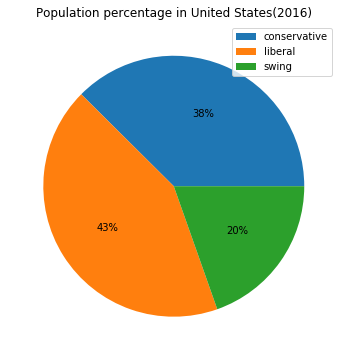

In [11]:
#1: Population composition in red,blue and waving states.
population=[redStates['population'].sum(),blueStates['population'].sum(),wavingStates['population'].sum()]
mylabel=['conservative','liberal','swing']
plt.figure(figsize=(6,6))
plt.pie(population,autopct='%1.0f%%')
plt.legend(labels=mylabel)
plt.title('Population percentage in United States(2016)')
plt.show()

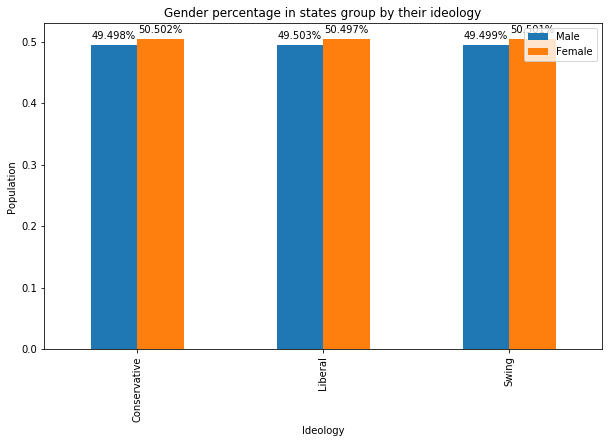

In [12]:
#2: Gender composition in different ideology
female=[redStates['femalePct'].mean(),blueStates['femalePct'].mean(),wavingStates['femalePct'].mean()]
male=[abs(1-redStates['femalePct'].mean()),abs(1-blueStates['femalePct'].mean()),abs(1-wavingStates['femalePct'].mean())]
mylabel=['Conservative','Liberal','Swing']
genderDf = pd.DataFrame({'Male':male,'Female':female},index=mylabel)

# #Normalize the values
gender_pct = genderDf.div(genderDf.sum(1), axis=0)

ax = gender_pct.plot.bar(figsize=(10,6))

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.3%}', (x + width/2, y + height*1.02), ha='center')

ax.set_xlabel('Ideology')
ax.set_ylabel('Population')
# ax.legend(labels=genderlabel)
plt.title('Gender percentage in states group by their ideology')
plt.show()

No matter in blue, red or swing state, there are no very big gap between male and female population, but female population is a bit higher than male population.

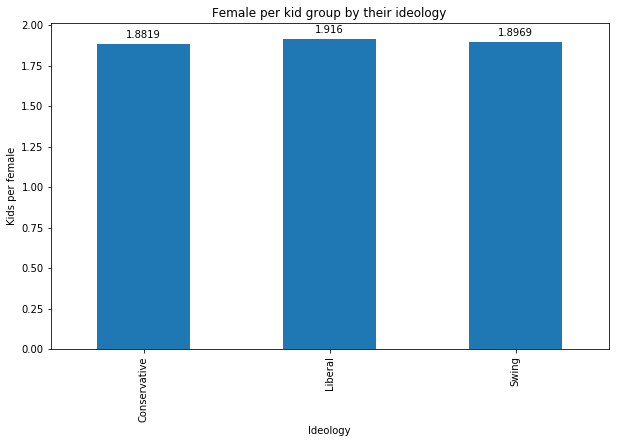

In [13]:
#3: The relationship between person under 5 years and female population(needs calculate)
femalePpl=[redStates['population'].sum()-(redStates['population'].sum()*redStates['femalePct'].mean()/100),
           blueStates['population'].sum()-(blueStates['population'].sum()*blueStates['femalePct'].mean()/100),
           wavingStates['population'].sum()-(wavingStates['population'].sum()*wavingStates['femalePct'].mean()/100)]
kidPpl=[redStates['population'].sum()-(redStates['population'].sum()*redStates['youngKidPct'].mean()/100),
       blueStates['population'].sum()-(blueStates['population'].sum()*blueStates['youngKidPct'].mean()/100),
       wavingStates['population'].sum()-(wavingStates['population'].sum()*wavingStates['youngKidPct'].mean()/100)]

kidPerFemale=[]
for each in range(len(femalePpl)):
    kidPerFemale.append(kidPpl[each]/femalePpl[each])

mylabel=['Conservative','Liberal','Swing']
kpfDf=pd.DataFrame({'Kid per female':kidPerFemale}, index=mylabel)

ax=kpfDf.plot.bar(figsize=(10,6),legend=None)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.5}', (x + width/2, y + height*1.02), ha='center')

ax.set_xlabel('Ideology')
ax.set_ylabel('Kids per female')
# ax.legend.remove()
plt.title('Female per kid group by their ideology')
plt.show()

Liberal states woman will born more baby than swing and conservative state, conservative state woman will born less baby than liberal and swing state.

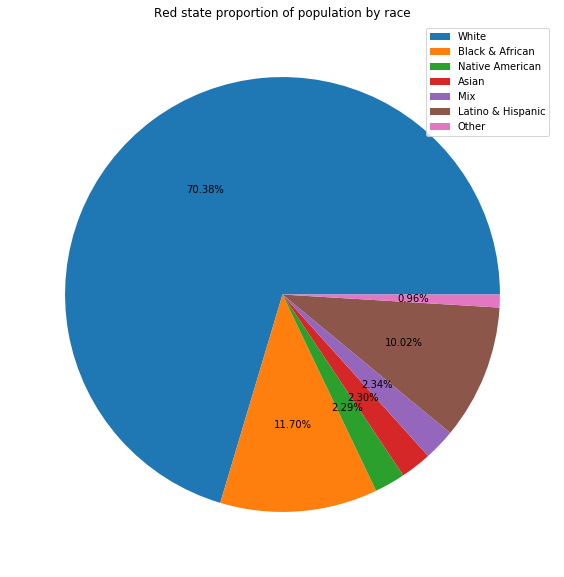

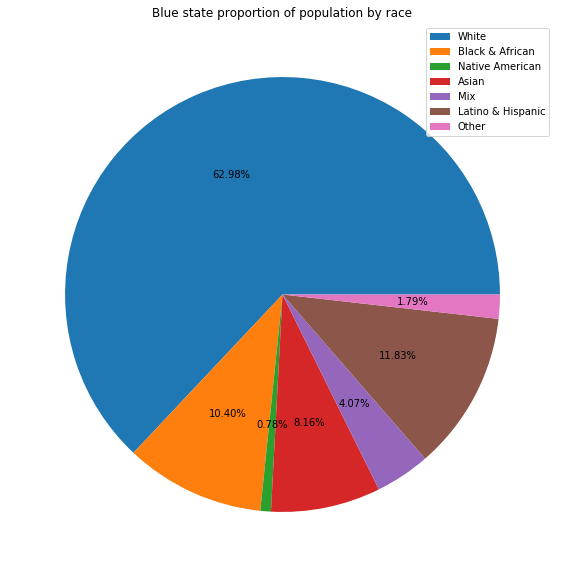

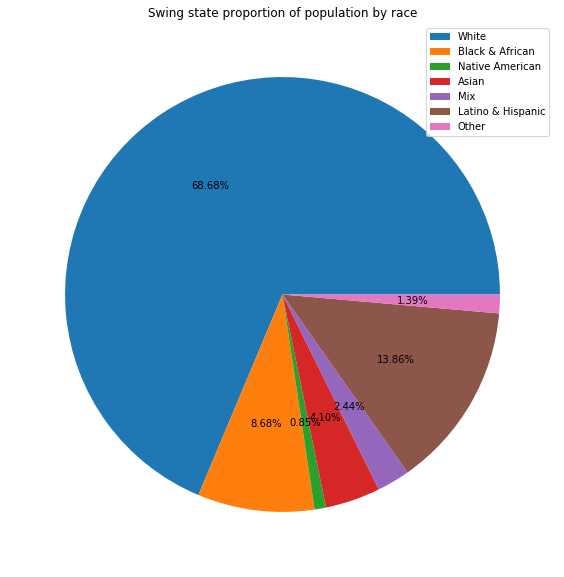

In [14]:
#3: Proportion of population by race
def racePieChart(dataSource,ideology):
    population=[dataSource['whitePct'].mean(),dataSource['blackPct'].mean(),
                dataSource['nativePct'].mean(),dataSource['asianPct'].mean(),dataSource['mixPct'].mean(),
                dataSource['latinPct'].mean(),dataSource['otherPct'].mean()]
    mylabel=['White','Black & African','Native American','Asian','Mix','Latino & Hispanic','Other']
    plt.figure(figsize=(10,10))
    plt.pie(population,autopct='%.2f%%')
    plt.legend(labels=mylabel)
    plt.title(str(ideology)+' state proportion of population by race')

racePieChart(redStates,'Red')
racePieChart(blueStates,'Blue')
racePieChart(wavingStates,'Swing')
plt.show()

No matter in blue, red or swing state, the most dominant population are white, black & African and Latino & Hispanic. Comparing with red or swing state, blue states have more minority race, especially Asian.

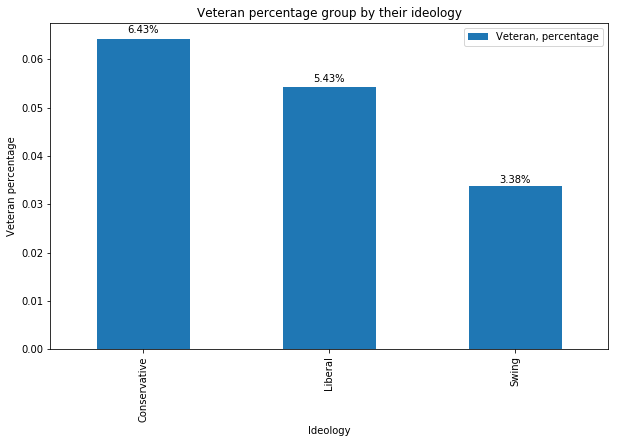

In [15]:
#4: Veteran population percentage
vetPct=[redStates['veterans'].sum()/redStates['population'].sum(),
        blueStates['veterans'].sum()/blueStates['population'].sum(),
        wavingStates['veterans'].sum()/blueStates['population'].sum()]
mylabel=['Conservative','Liberal','Swing']
vetPctDf=pd.DataFrame({'Veteran, percentage':vetPct}, index=mylabel)

ax=vetPctDf.plot.bar(figsize=(10,6))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')
    
ax.set_xlabel('Ideology')
ax.set_ylabel('Veteran percentage')
# ax.legend.remove()
plt.title('Veteran percentage group by their ideology')
plt.show()

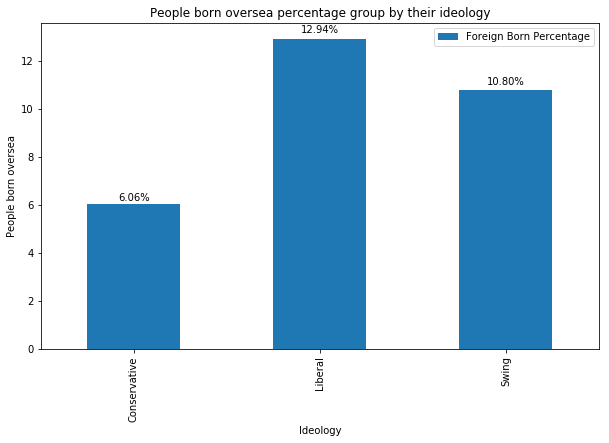

In [16]:
#5: Foreign born population percentage
fbPct=[redStates['foreignBornPct'].mean(),blueStates['foreignBornPct'].mean(),wavingStates['foreignBornPct'].mean()]
mylabel=['Conservative','Liberal','Swing']
fbPctDf=pd.DataFrame({'Foreign Born Percentage':fbPct}, index=mylabel)

ax=fbPctDf.plot.bar(figsize=(10,6))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    val=height/100
    x, y = p.get_xy() 
    ax.annotate(f'{val:.2%}', (x + width/2, y + height*1.02), ha='center')
    
ax.set_xlabel('Ideology')
ax.set_ylabel('People born oversea')
plt.title('People born oversea percentage group by their ideology')
plt.show()

More than 10 Percent of population in blue states was born oversea, but only 6.06 percent of population is red states are born oversea. Between those two values, swing states have 10.8 percent of population born oversea.

# 3:Cross-dataset analysis

In [17]:
#Using the highest population as representative of different ideologies and analyse its gun related issue.
redRep=redStates[redStates['population'] == redStates['population'].max()]
blueRep=blueStates[blueStates['population'] == blueStates['population'].max()]
swingRep=wavingStates[wavingStates['population'] == wavingStates['population'].max()]

In [18]:
redRep

,state,population,femalePct,youngKidPct,whitePct,blackPct,nativePct,asianPct,mixPct,latinPct,veterans,foreignBornPct,ideology,otherPct
42,Texas,27862596,50.4,7.2,42.6,12.6,1.0,4.8,1.9,39.1,1539655,16.6,red,2.0


In [19]:
blueRep

,state,population,femalePct,youngKidPct,whitePct,blackPct,nativePct,asianPct,mixPct,latinPct,veterans,foreignBornPct,ideology,otherPct
4,California,39250017,50.3,6.3,37.7,6.5,1.7,14.8,3.8,38.9,1777410,27.0,blue,3.4


In [20]:
swingRep

,state,population,femalePct,youngKidPct,whitePct,blackPct,nativePct,asianPct,mixPct,latinPct,veterans,foreignBornPct,ideology,otherPct
8,Florida,20612439,51.1,5.5,54.9,16.8,0.5,2.9,2.1,24.9,1507738,19.7,swing,2.1


In [21]:
stateFilter=['Texas','California','Florida']
filteredGunDf=gun_df[gun_df['state'].isin(stateFilter)][::-1].reset_index()

In [22]:
filteredGunDf[filteredGunDf['state'] == 'Texas']

,index,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,ideology
0,12476,1998-11,Texas,0.0,NaN,1384.0,1349.0,NaN,60,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2794,red
3,12421,1998-12,Texas,5324.0,NaN,22478.0,50899.0,NaN,903,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79605,red
6,12366,1999-01,Texas,5792.0,NaN,18123.0,26179.0,NaN,898,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50992,red
9,12311,1999-02,Texas,5444.0,NaN,21500.0,27078.0,NaN,1126,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55148,red
12,12256,1999-03,Texas,5818.0,NaN,21305.0,25971.0,NaN,977,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54096,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,266,2017-05,Texas,24168.0,0.0,42366.0,27991.0,2991.0,2226,0.0,...,0.0,0.0,55.0,39.0,8.0,3.0,2.0,2.0,109732,red
669,211,2017-06,Texas,23877.0,0.0,48895.0,29119.0,3000.0,2307,0.0,...,0.0,0.0,55.0,44.0,10.0,2.0,7.0,1.0,118091,red
672,156,2017-07,Texas,19006.0,0.0,36913.0,27245.0,2653.0,2193,0.0,...,0.0,0.0,67.0,45.0,9.0,1.0,3.0,0.0,98338,red
675,101,2017-08,Texas,22971.0,0.0,37277.0,34884.0,2093.0,2474,0.0,...,0.0,0.0,83.0,63.0,6.0,1.0,1.0,2.0,110946,red


In [23]:
#   Metadata:

# • Handgun—(a) any firearm which has a short stock and is designed to be held and fired 
#   by the use of a single hand; and (b) any combination of parts from which a firearm 
#   described in paragraph (a) can be assembled.

# • Long Gun—a weapon designed or redesigned, made or remade, and intended to be fired 
#   from the shoulder, and designed or redesigned and made or remade to use the energy 
#   of the explosive in (a) a fixed metallic cartridge to fire a single projectile through 
#   a rifled bore for each single pull of the trigger; or (b) a fixed shotgun shell to fire 
#   through a smooth bore either a number of ball shot or a single projectile for each single 
#   pull of the trigger.

# • Other—refers to frames, receivers, and other firearms that are neither handguns nor long 
#   guns (rifles or shotguns), such as firearms having a pistol grip that expel a shotgun shell, 
#   or National Firearms Act firearms, including silencers.

# • Prepawn—background checks requested by an officially-licensed FFL on prospective firearm 
#   transferees seeking to pledge or pawn a firearm as security for the payment or repayment of money, 
#   prior to actually pledging or pawning the firearm.

# • Redemption—background checks requested by an officially-licensed FFL on prospective firearm 
#   transferees attempting to regain possession of a firearm after pledging or pawning a firearm as 
#   security at a pawn shop.

# • Returned/Disposition—background checks requested by criminal justice/law enforcement agencies 
#   prior to returning a firearm in its possession to the respective transferee, to ensure the individual 
#   is not prohibited.

# • Rentals—background checks requested by an officially-licensed FFL on prospective firearm transferees 
#   attempting to possess a firearm when the firearm is loaned or rented for use off the premises of the business.

# • Private Sale—background checks requested by an officially-licensed FFL on prospective firearm 
#   transferees attempting to possess a firearm from a private party seller who 
#   is not an officially-licensed FFL.

# • Return to Seller-Private Sale—background checks requested by an officially-licensed FFL on prospective 
#   firearm transferees attempting to possess a firearm from a private party seller who is not an 
#   officially-licensed FFL.

In [24]:
filteredGunDf.dtypes

index                          int64
month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
t

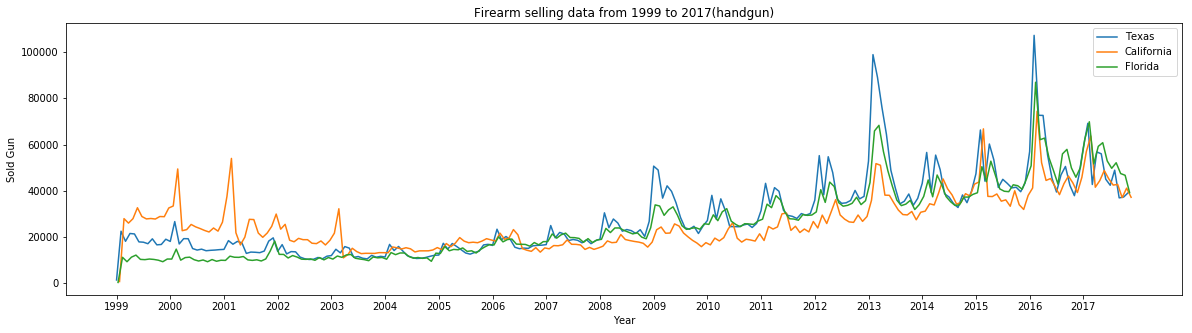

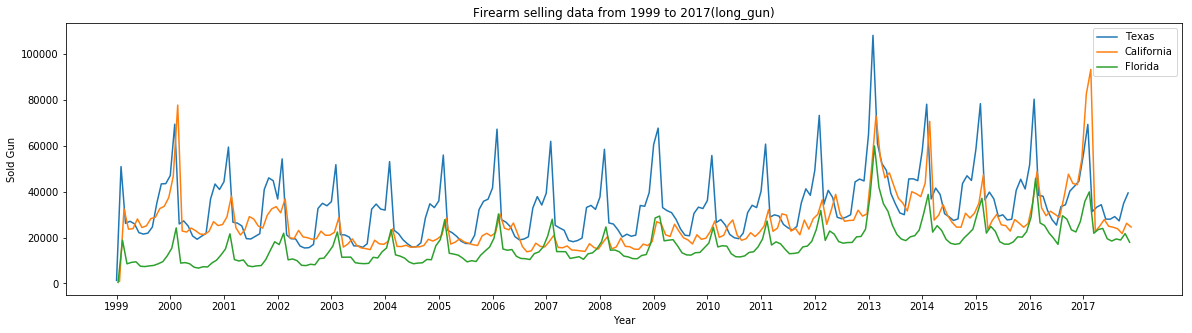

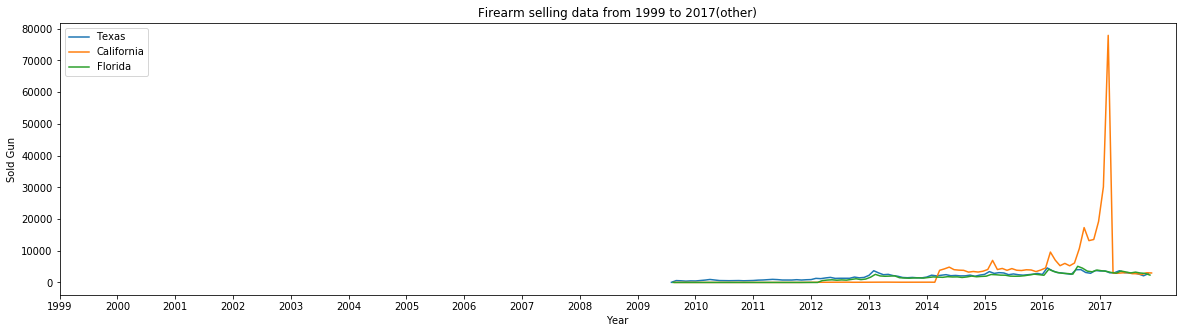

In [25]:
# Line chart---
#1: hand gun purchase
#2: long gun purchase
#3: other gun purchase


def gunPurchase(gunType):
    plt.figure(figsize=(20,5))
    rep=['Texas','California','Florida']
    for each in rep:
        plt.plot(filteredGunDf[filteredGunDf['state'] == each][gunType],label=each)
    plt.xticks([x for x in range(0,len(filteredGunDf),36)],(str(x) for x in range(1999,2018)))
    plt.xlabel('Year')
    plt.ylabel('Sold Gun')
    plt.title('Firearm selling data from 1999 to 2017(' + gunType + ')')
    plt.legend()
    

gunPurchase('handgun')
gunPurchase('long_gun')
gunPurchase('other')
plt.show()

-In most of situations, conservative state have more gun purchase for all kinds of firearms including handgun, long gun and other firearms. 

-Before 2003, different from our stereotype, people in California are more interested in handgun than Texas.

-Three peaks of handgun purchase: 2001 may related to 911, 2009 may related to series of mass shooting(even in US military camp), 2013 may related to Boston terror attack and Obama's gun restriction act(not passed), I haven't find anything I think is related in 2016, maybe president election?

-Different from handgun, long gun's purchase visualisation looks like very regular. It may related to stronger restriction, and most of long gun buyer have specific use of their firearm(such as hunting and collection)

-In 2017, we found a sharp increase in "Other", it may related to after mass shooting in Nevada, California government banned bump stock grip to stop people to refit their semi-auto rifle to full-auto rifle. This cause panic buying of bump stock grip and long gun in California before the law activated.

In [26]:
#pie chart---
#pie chart of three different kind of guns in three states(latest date)
filteredGunDf.dropna(inplace=True)
filteredGunDf.head()

,index,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,ideology
639,761,2016-08,Texas,25803.0,0.0,42302.0,40269.0,3137.0,2347,0.0,...,0.0,0.0,11.0,14.0,1.0,1.0,1.0,1.0,124608,red
640,724,2016-08,Florida,31652.0,0.0,49867.0,23359.0,3572.0,1877,3.0,...,0.0,0.0,15.0,4.0,0.0,0.0,0.0,0.0,114446,swing
641,719,2016-08,California,75535.0,0.0,43344.0,43552.0,13186.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176770,blue
642,706,2016-09,Texas,29142.0,0.0,37858.0,42308.0,2888.0,2436,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126694,red
643,669,2016-09,Florida,24431.0,0.0,45848.0,22439.0,3359.0,1891,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102843,swing


In [27]:
def gunPieChart(state):
    def gunPercent(state):
        temp=[]
        gunPercent=[]
        for each in ['handgun','long_gun','other']:
            temp.append(filteredGunDf[filteredGunDf['month'] == '2016-08'][filteredGunDf['state'] == state][each].values[0])
        for each in temp:
            gunPercent.append(each/sum(temp))
        return gunPercent
    gun=gunPercent(state)    
    mylabel=['Handgun','Long gun','Other']
    plt.figure(figsize=(10,10))
    plt.pie(gun,autopct='%.2f%%')
    plt.legend(labels=mylabel)
    plt.title(str(state)+"'s firearm proportion")

    
for each in ['Texas','California','Florida']:
    gunPieChart(each)    

/Users/ishirunkang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


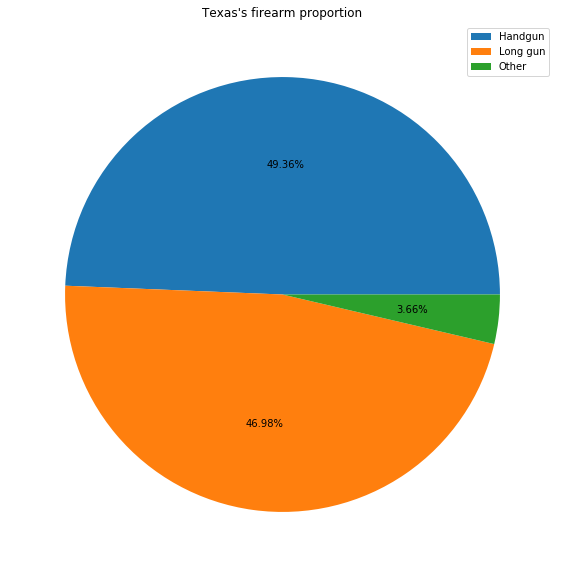

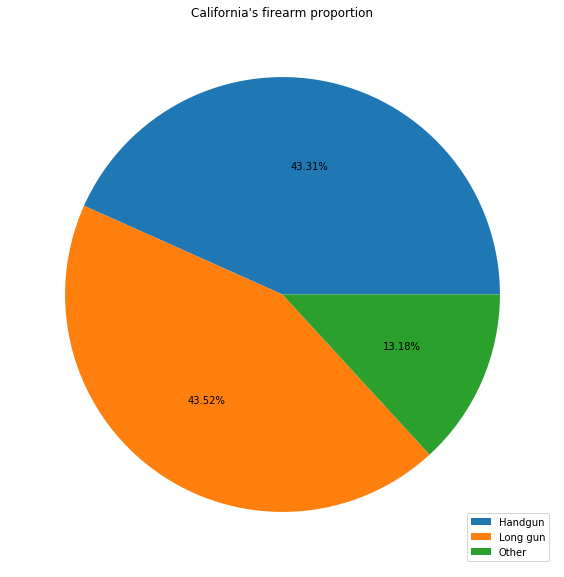

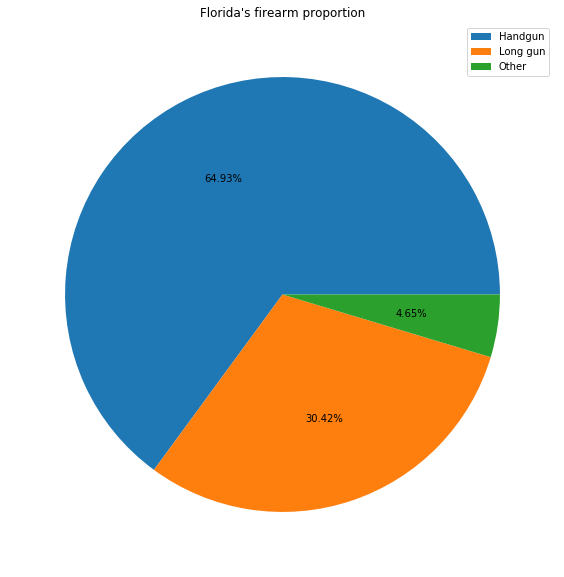

In [28]:
plt.show()

-Handgun is the most popular in all three represented states.

-Texas gun owner more like long gun

# Conclusion

Findings:

-If we split each states by their ideology, their race, population, veteran status and immigration status are obviously different. 

-Different from our stereotype, people live in liberal state(take California for example) are also interested in firearms, sometimes even more than conservative state(take Texas for example). the peak of gun purchase of three different ideologies are coincide with the others. But overall, people live in conservative states are still more interested in firearms than liberal and swing state, and they buy more long firearm than any other states.

Limitations:

-This is the first submission, so my skills are still very limited. If possible, I can use more data to find more valuable information.

-Visualisation should looks better.

-Statistical knowledge should be used to analyse the relationship of swing state's vote side and given data. e.g., Comparing with old data and data in 2016, if Florida have less veteran, more oversea born population, more minority population and more baby per woman, is that means Florida will vote for Democrat?